# Scrapping the reviews for the kdrama "The Glory" from its IMDB page

In [1]:
from selenium import webdriver 
from selenium.webdriver.common.by import By
from time import sleep
import pandas as pd
import numpy as np

In [88]:
path = "https://www.imdb.com/title/tt21344706/reviews?ref_=tt_urv"
#open the browser
browser = webdriver.Chrome()
browser.get(path)
browser.maximize_window()

In [89]:
reviews = []

for i in range(5):
    print("Scrapping Page", i+1)
    review = browser.find_elements(By.XPATH, "//div[@class='text show-more__control clickable']")
    for r in review:
        reviews.append(r.text.replace("\n",""))
    loadmore_button = browser.find_element(By.XPATH, "//button[@class='ipl-load-more__button']")
    loadmore_button.click()
    sleep(2)

Scrapping Page 1
Scrapping Page 2
Scrapping Page 3
Scrapping Page 4
Scrapping Page 5


In [90]:
len(reviews)

143

In [91]:
reviews

["American TV take note. The Koreans are producing some outstanding films and TV shows and The Glory is a shining example of this.This is the first Korean TV series my wife has seen and with the last episode still to play out, she is already a fan of them.The Glory achieves exactly what you want from a TV show like this... something you look forward to watching at the end of a busy day. It's so engaging that we have been watching 2 to 3 episodes each night, with almost no distraction from our mobile/cells phone.The story its self has several levels to it and goes deeper than what I was expecting... and where I would normally expect a twist (had it been an American series) The Glory show catches me off guard by playing out exactly as it should do.The sole reason for removing 1 star is it does feel a little drawn out at times, but oddly, it also works as at no time did I feel bored watching it.As a result The Glory comes Highly Recommended!",
 'You think Penthouse: War In Life (2020) or 

# Sentiment Analysis on the reviews scrapped

In [26]:
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("IMDB Dataset.csv")

In [32]:
col_name=["Review","Sentiment"]
data.columns = col_name
data.head()

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [36]:
data['Sentiment'].value_counts()

Sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Remove stopwords, punctuations, lemmatization

In [53]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
nlp = spacy.load('en_core_web_sm')
stopwords = list(STOP_WORDS)

In [55]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
def text_data_cleaning(sentence):
  doc = nlp(sentence)

  tokens = [] # list of tokens
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
 
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

Vectorization Feature Engineering (TF-IDF)

In [40]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [41]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)

In [42]:
classifier = LinearSVC()

Train the model

In [44]:
x = data['Review']
y = data['Sentiment']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [46]:
x_train.shape, x_test.shape

((40000,), (10000,))

Fit the x_train and y_train

In [47]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])

In [56]:
clf.fit(x_train, y_train)

C:\Users\Sakshi\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x0000016F4143C430>)),
                ('clf', LinearSVC())])

Predict the Test set results

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[4455,  580],
       [ 501, 4464]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5035
    positive       0.89      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [59]:
accuracy_score(y_test, y_pred)

0.8919

Predict the sentiment of Oppenheimer's reviews

In [63]:
clf.predict(OH_data)

array(['negative'], dtype=object)

In [102]:
sentiment = []

for r in reviews:
    pred = clf.predict(reviews)
   


In [103]:
pred

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positi

In [104]:
TG_data = pd.DataFrame()
TG_data['Reviews'] = reviews
TG_data['Sentiment'] = pred
TG_data

,Reviews,Sentiment
0,American TV take note. The Koreans are produci...,positive
1,You think Penthouse: War In Life (2020) or The...,positive
2,One should not watch this as a K-drama point o...,positive
3,Binge watched on a sleepless night and glad I ...,positive
4,Brilliant work is the least I could say to des...,positive
...,...,...
138,The story as such is great. A woman seeks reve...,negative
139,I love me some nasty people getting their come...,positive
140,I'm a fan of Korean revenge dramas and movies....,positive
141,What a masterpiece of great work! Well done Co...,positive


In [105]:
TG_data['Sentiment'].value_counts()

Sentiment
positive    101
negative     42
Name: count, dtype: int64

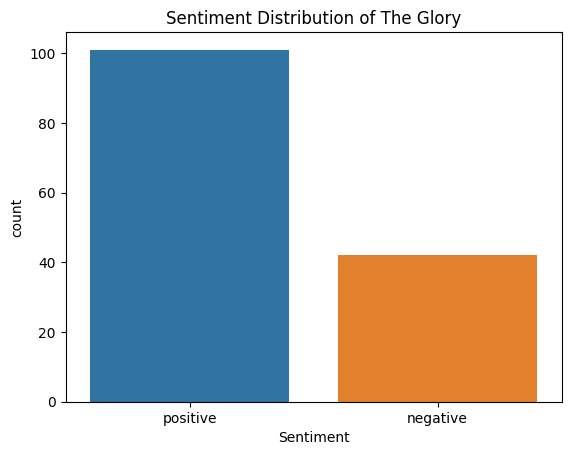

In [107]:
import seaborn as sns
sns.countplot(x='Sentiment', data=TG_data)
plt.title("Sentiment Distribution of The Glory")
plt.show()

The analysis shows that the series "The Glory" was quite popular with positive reviews.